<a href="https://colab.research.google.com/github/davidyr23/Fisicacomputacional1/blob/master/Actividad4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Preparamos los datos que vamos a utilizar para esta actividad:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = "https://raw.githubusercontent.com/davidyr23/Fisicacomputacional1/master/Actividad1/climatologiaBadiraguato.txt"

# Nombramos las columnas del df
my_cols = ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin']

# El archivo tiene códigos ASCII extendido (Español), encoding='cp1251' Windows (Europa Occidental)
# El separador de datos es de uno o más espacios, sep='\s+'
# Bricamos los primeros 19 renglones y el último (skiprows), afirmamos que no nay encabezado (header=None)
# Proceamos los datos utilizando Python, engine='python' 

df_badiraguato = pd.read_csv(url, names=my_cols, encoding="cp1251", sep="\s+", header=None, skiprows=19, skipfooter=1, engine="python")
# df_badiraguato

# Observamos el encabezado y el final de los datos
# print(df_badiraguato.head())
# print(df_badiraguato.tail())

# Observamos la dimensión de los datos
# df_badiraguato.shape

# Observamos la información de los datos
# df_badiraguato.info()

# Se realiza una copia con la que trabajar para no perder el origigi
df_c=df_badiraguato.copy()


# Reemplazamos los textos 'Nulo' por espacio en blanco ''
str_Nulo = 'Nulo'
df_c = df_c.replace(to_replace=str_Nulo, value='', regex=True)
# df_c.head()

# Imprimimos la info actualizada del df
# df_c.info()
# print(df_c.head())

# Procedemos a convertir los datos del badiraguato a valores numericos para poder trabajar los datos
columnas = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in columnas:
  df_c[cols] = pd.to_numeric(df_c[cols], errors="coerce")


# Observamos que datos faltan
# df_c.isnull().sum()

# Realizamos un breve analísis estadistico redondeado a 2 cifras.
# df_c.describe().round(2)

# Nueva copia de seguridad
df_c1 = df_c.copy()

# Asignamos formato de fecha: (.copy necesario pq sino la hace de pancho)
df_c1["Fecha"] = pd.to_datetime(df_c1["Fecha"], dayfirst=True ).copy()

# Añadimos las columnas de año y mes ademas de la de fecha
df_c1["Año"] = df_c1["Fecha"].dt.year
df_c1["Mes"] = df_c1["Fecha"].dt.month


# Observamos una muestra aleatoria de 10 renglones
# df_c1.sample(10)


##**Ahora realizamos una preparación adicional de los datos**

In [ ]:
# Eliminamos el formato numerico para el mes y se le coloca un formato de caracteres
# df_c1.drop sirve para elimnar la columna
df_c1.drop("Mes", axis=1, inplace=True)
# .dt.strftime es el comando que hace el cambio
df_c1["Mes"] = df_c1["Fecha"].dt.strftime("%b")

# dc_c1.Tmax == dc_c1["Tmax"] no nos sirve aquí pues seleccionar colum con .Tmax no permite crear columnas, solo tomarlas y graficar, promediar, etc.

df_c1.head()

,Fecha,Precip,Evap,Tmax,Tmin,Año,Mes
0,1960-01-01,0.0,NaN,NaN,NaN,1960,Jan
1,1960-01-02,0.0,NaN,NaN,NaN,1960,Jan
2,1960-01-03,6.0,NaN,NaN,NaN,1960,Jan
3,1960-01-04,30.0,NaN,NaN,NaN,1960,Jan
4,1960-01-05,0.0,NaN,NaN,NaN,1960,Jan


##**Representación gráfica de los datos**

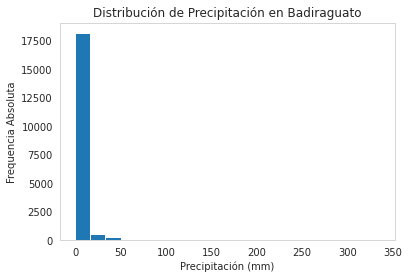

In [ ]:
# Elaboración de Histogramas
# Utilizamos Matplotlib.Pyplot, abreviado como plt 
# Usaremos la notación equivalente de columnas, df['Variable'] = df.Variable

plt.hist(df_c1.Precip, bins=20)
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de Precipitación en Badiraguato')
plt.grid()
plt.show()

##**Realizamos otras gráficas**

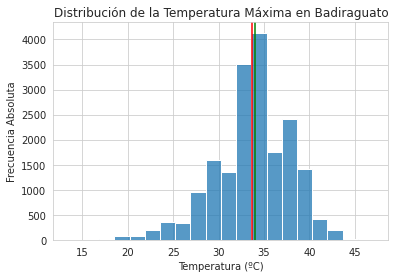

In [ ]:
# Grafica (histograma) de temperatura maxima:
# Seleccionamos estilo de la grafica
sns.set_style("whitegrid")

# Obtenemos cantidades especificas de interes a presentar
# Necesitamos recordar que para seleccionar la columna Tmax se puede usar: dc_c1.Tmax == dc_c1["Tmax"]

tmed = df_c1.Tmax.median()
tprom = df_c1.Tmax.mean()

# Al momento de graficar, data es para tomar el data frame y con x o y se elgien los datos para cada eje.  Bins num de clases

sns.histplot(data=df_c1, x="Tmax", bins=20)

# Indicamos que se añadan los valores de interes como lineas verticales con "axvline"
plt.axvline(x=tmed, color="g", label="m")
plt.axvline(x=tprom, color="r", label="x")

# Damos formato al grafico:

plt.xlabel("Temperatura (ºC)")
plt.ylabel("Frecuencia Absoluta")
plt.title("Distribución de la Temperatura Máxima en Badiraguato")

# Imprimimos la grafica
plt.show()

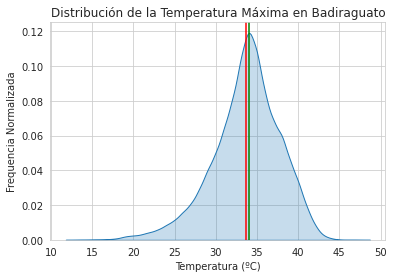

In [ ]:
# Graficamos la función de densidad de probabilidad o KDE (Kernel Density Estimate)
# Estilo
sns.set_style("whitegrid")

# Graficamos los puntos y datos de interes
sns.kdeplot(df_c1.Tmax, fill=True)
plt.axvline(x=tmed, color="g", label="m")
plt.axvline(x=tprom, color="r", label="x")

# Damos formato
plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Máxima en Badiraguato')

# Printeando grafica
plt.show()

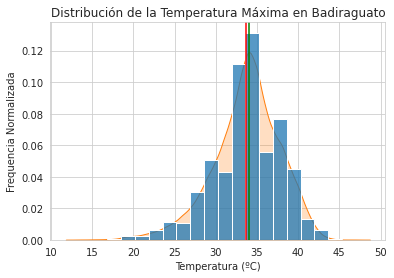

In [ ]:
# Ahora, debido la relación de ambas, sobreponemos las dos ultimas graficas:
sns.set_style("whitegrid")

sns.histplot(data=df_c1, x="Tmax", bins=20, stat="density")
sns.kdeplot(df_c1.Tmax, fill=True)
plt.axvline(x=tmed, color="g", label="m")
plt.axvline(x=tprom, color="r", label="x")

plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Máxima en Badiraguato')

plt.show()

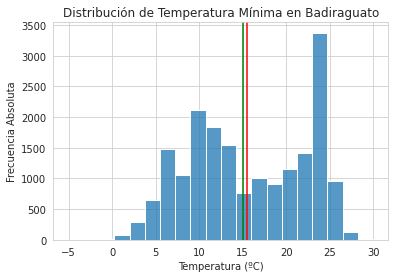

In [ ]:
# Haremos lo mismo para la temperatura minima
sns.set_style("whitegrid")
sns.histplot(data=df_c1, x="Tmin", bins=20)

tmin_prom=df_c1.Tmin.mean()
tmin_med=df_c1.Tmin.median()

plt.axvline(x=tmin_med, color="g")
plt.axvline(x=tmin_prom, color="r")
plt.xlabel("Temperatura (ºC)")
plt.ylabel("Frecuencia Absoluta")
plt.title("Distribución de Temperatura Mínima en Badiraguato")

plt.show()

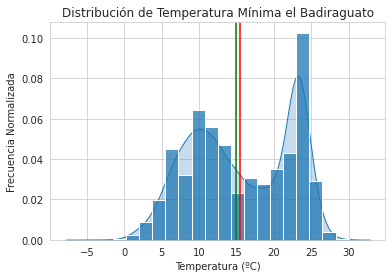

In [ ]:
sns.set_style("whitegrid")
sns.kdeplot(df_c1.Tmin, fill=True)
sns.histplot(data=df_c1, x="Tmin", bins=20, stat="density")
plt.axvline(x=tmin_med, color ="g")
plt.axvline(x=tmin_prom, color="r")

plt.xlabel("Temperatura (ºC)")
plt.ylabel("Frecuencia Normalizada")
plt.title("Distribución de Temperatura Mínima el Badiraguato")

plt.show()

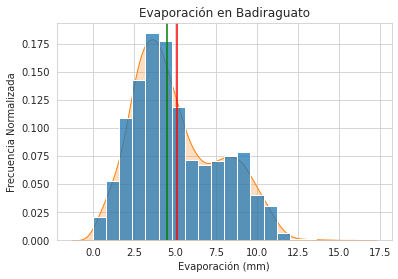

In [ ]:
sns.set_style("whitegrid")
# Al final ponemos ";" o "plt.show()" para que no muestre algun otro mensaje
sns.histplot(data=df_c1, x= "Evap", bins=20, stat="density")
sns.kdeplot(df_c1["Evap"], fill=True)

Emed=df_c1["Evap"].median()
Eprom=df_c1.Evap.mean()
plt.axvline(x=Emed, color="g")
plt.axvline(x=Eprom, color="r")

plt.xlabel("Evaporación (mm)")
plt.ylabel("Frecuencia Normalizada")
plt.title("Evaporación en Badiraguato");

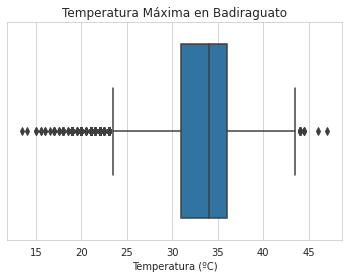

In [ ]:
# Ahora graficamos la caja (boxplot) para Tmax
sns.set_style("whitegrid")
# Podemos dar nombre a la grafica y a los ejes como se ha venido haciendo con plt.xlabel etc o con .set de SeaBorn.
sns.boxplot(data=df_c1, x="Tmax", orient="h").set(xlabel="Temperatura (ºC)", title = "Temperatura Máxima en Badiraguato");

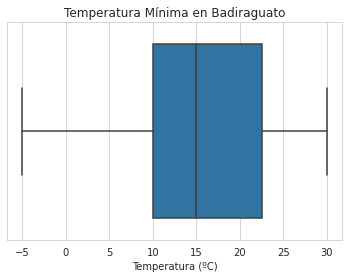

In [ ]:
# boxplot para Tmin
sns.set_style("whitegrid")
sns.boxplot(data=df_c1, x="Tmin", orient="h")
plt.xlabel("Temperatura (ºC)")
plt.title("Temperatura Mínima en Badiraguato");

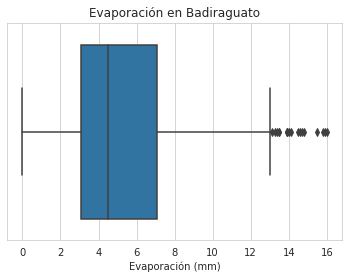

In [ ]:
# Boxplot para evaporación
sns.set_style("whitegrid")
sns.boxplot(data=df_c1, x="Evap", orient="h")

plt.xlabel("Evaporación (mm)")
plt.title("Evaporación en Badiraguato");

##**Analizamos periodos de datos**

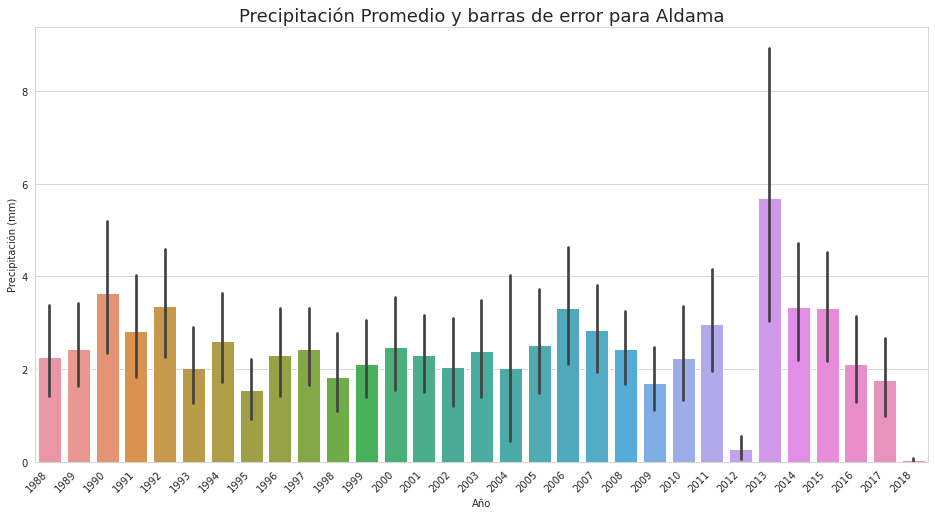

In [ ]:
# La base de datos de Badiraguato comienza en 1960 y finaliza en 2018, precisamente este rango de datos es de interes pues queremos analizar los ultimos 30 años.

df_muestra = df_c1[(df_c1["Año"] >= 1988) & (df_c1["Año"] <=2018)]
# df_muestra

# Graficamos de precipitación del periodo de interes
# Agrupamos por año
sns.set_style("whitegrid")
# Dimencionar la grafica utilizamos la instrucción "figsize" parametros (16,8) (largo,ancho)
plt.figure(figsize=(16,8))

# Creamos la grafica y se asigna a "g" para ajustar la etiqueta de año en los datos y que más agradable al ojo
g=sns.barplot(data=df_muestra, x= "Año", y="Precip")
# Rotamos 45 grados las etiquetas
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment="right")


plt.xlabel("Año")
plt.ylabel("Precipitación (mm)")
# Ajustamos el tamaño del titulo
plt.title("Precipitación Promedio y barras de error para Badiraguato", fontsize=18)
plt.show()

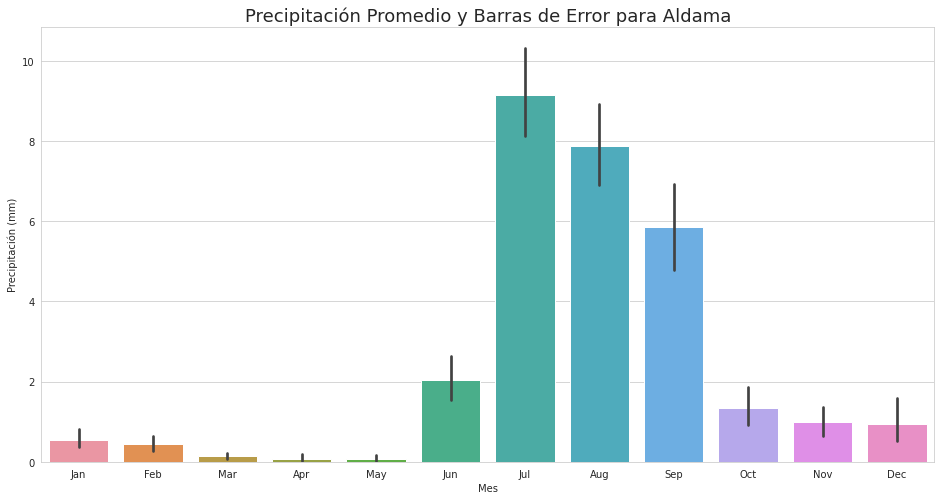

In [ ]:
# Misma gráfica (precipitación) agrupada ahora por mes, en el rango de datos de interes.
sns.set_style("whitegrid")
# Dimencionamos
plt.figure(figsize=(16,8))

sns.barplot(data=df_muestra, x= "Mes", y="Precip")

# No es necesario ajustar las etiquetas pues no se amontonan

plt.xlabel("Mes")
plt.ylabel("Precipitación (mm)")
plt.title("Precipitación Promedio y Barras de Error para Badiraguato", fontsize=18)
plt.show()

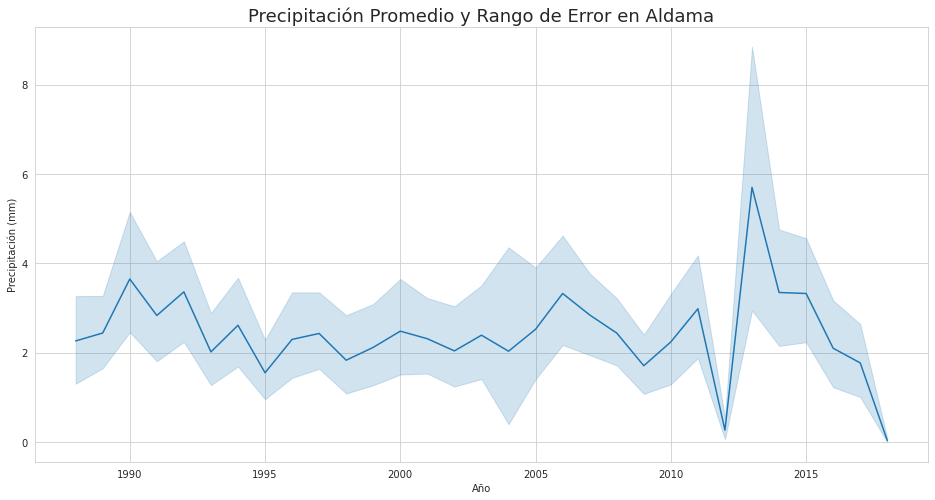

In [ ]:
# Ahora graficamos los datos con lineas.
# Esto se hará con el comando sns.lineplot
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))

sns.lineplot(data=df_muestra, x="Año", y="Precip")
plt.xlabel("Año")
plt.ylabel("Precipitación (mm)")
plt.title("Precipitación Promedio y Rango de Error en Badiraguato", fontsize=18)
plt.show()

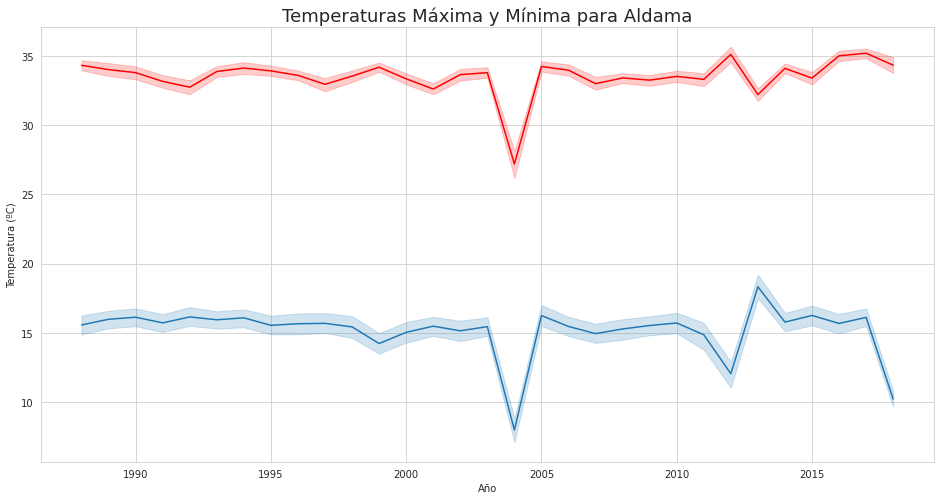

In [ ]:
# Graficamos con lineas para temperatura máxima y mínima
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))

sns.lineplot(data=df_muestra, x = "Año", y= "Tmax", color="r")
sns.lineplot(data=df_muestra, x="Año", y = "Tmin")

plt.xlabel("Año")
plt.ylabel("Temperatura (ºC)")
plt.title("Temperaturas Máxima y Mínima para Badiraguato", fontsize=18)
plt.show()

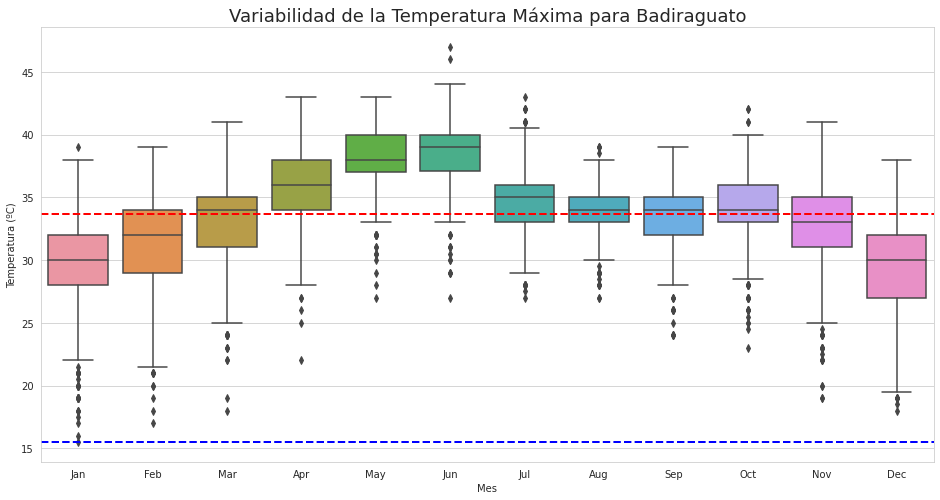

In [ ]:
# Realizamos graficas boxplot agrupadas por mes.
# Primero, de las temperaturas máximas en los ultimos 36 años:
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))

sns.boxplot(data=df_muestra, x = "Mes", y= "Tmax", orient="v")
Tmax_p=df_muestra.Tmax.mean()
Tmin_p=df_muestra.Tmin.mean()
#axhline grafica una linea horizontal, linestyle da el tipo de linea
plt.axhline(y=Tmax_p, color="r", linestyle="--", linewidth=2)
plt.axhline(y=Tmin_p, color="b", linestyle="--", linewidth=2)

plt.xlabel("Mes")
plt.ylabel("Temperatura (ºC)")
plt.title("Variabilidad de la Temperatura Máxima para Badiraguato", fontsize=18)
plt.show()


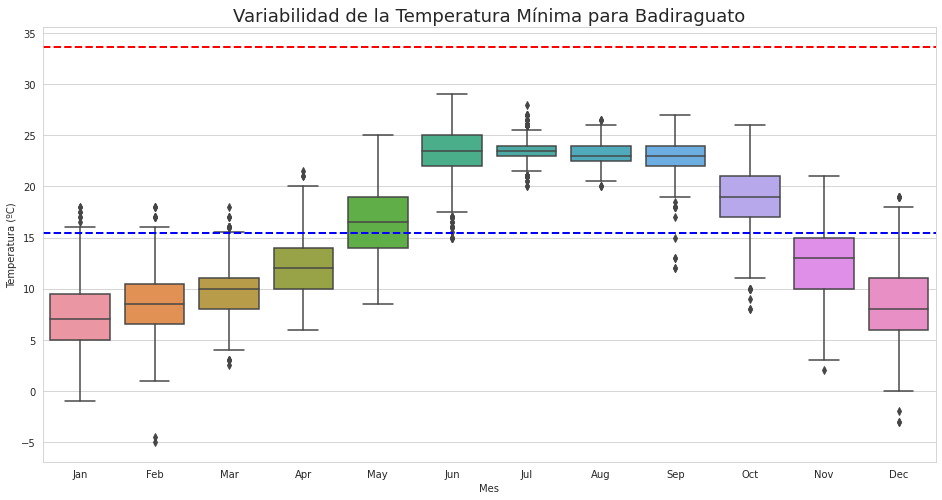

In [ ]:
# Diagrama de cajas para la temperatura minima, agrupada por mes, en los ultimos 36 años
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))

sns.boxplot(data=df_muestra, x="Mes", y="Tmin", orient="v")
plt.axhline(y=Tmin_p, color="b", linestyle="--", linewidth=2)
plt.axhline(y=Tmax_p, color="r", linestyle="--", linewidth=2)

plt.xlabel("Mes")
plt.ylabel("Temperatura (ºC)")
plt.title("Variabilidad de la Temperatura Mínima para Badiraguato", fontsize=18)
plt.show()

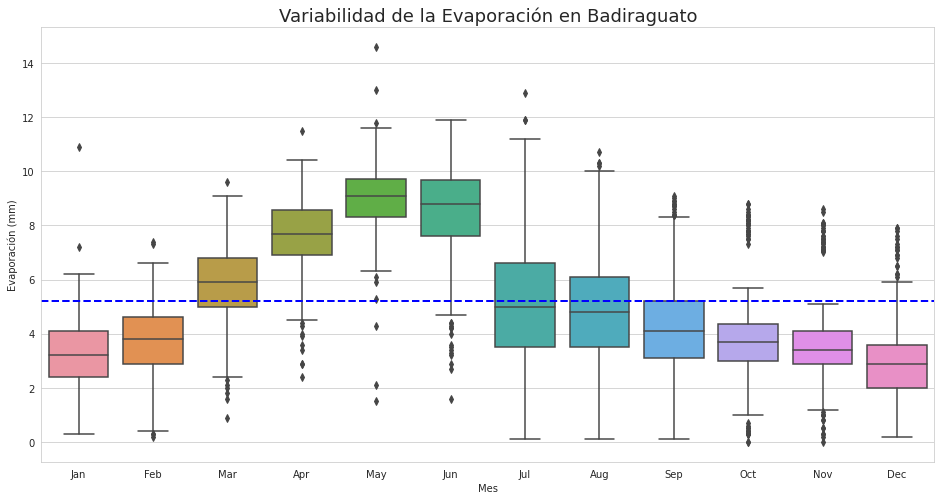

In [ ]:
# Diagrama de cajas para la evaporación por mes en los ultimos 36 años
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))

Evap_prom=df_muestra.Evap.mean()

sns.boxplot(data=df_muestra, x="Mes", y="Evap", orient="v")
plt.axhline(y=Evap_prom, color="b", linestyle="--", linewidth=2)

plt.xlabel("Mes")
plt.ylabel("Evaporación (mm)")
plt.title("Variabilidad de la Evaporación en Badiraguato", fontsize=18)
plt.show()
